# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

У нас есть следущая информация для дальшейшей обработки и выводов:  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
city_centers_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around_3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around_3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

**Посмотрим на первые 10 строк.**

In [3]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Переименуем названия колонок, чтобы соблюсти стилистику.**

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

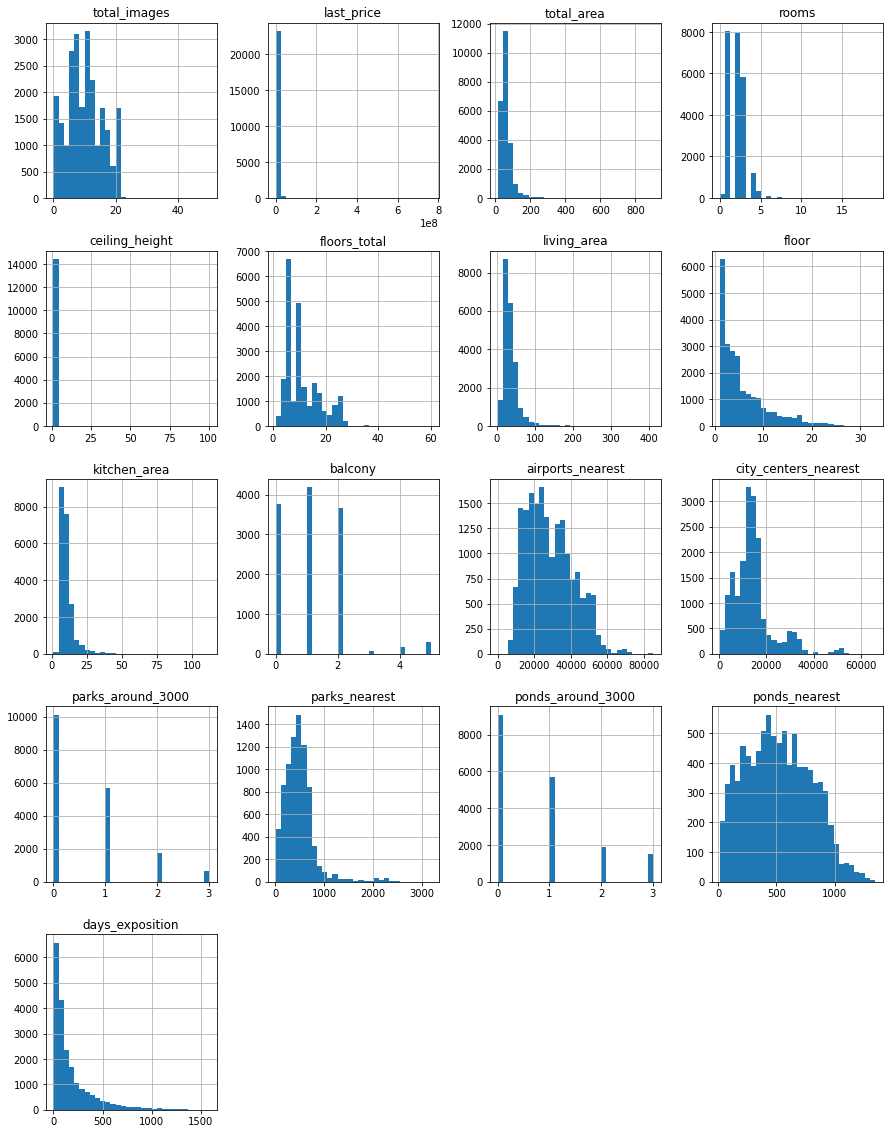

In [7]:
numeric_columns = []
for column in data:
    if data[column].dtype in ['float64', 'int64']:
        numeric_columns.append(column)

data[numeric_columns].hist(bins=30, figsize=(15, 20))

plt.show()

Первым этапом мы изучили общие данные датафрейма и убрали нарушения в стилистике.  
На основании гистрограмм числовых значений можем сделать выводы о квартирах, которые продают чаще всего:  
1. В основном продают квартиры общей площадью около 100 квадратных метров от 1 до 7 этажа.  
2. Жилая площадь около 60 квадратных метров.  
3. Площадь кухни занимает 12 квадратных метров.  
4. В квартире либо есть 1 балкон, либо отсутствует.  
5. В квартире 1-2 комнаты.  
6. Аэропорт находится в 25 км от дома, а до центра города 20 км.  
7. В радиуме 3 км нет парка или пруда. Либо есть в радиусе 1 км.  
8. Объявления о продаже висят около 300 дней.  

Подтвердить или опровергнуть эту информацию мы сможем после того, как посмотрим детальнее информацию о ряде пунктов.

### Выполните предобработку данных

**2.1 Для начала посмотрим, где есть пропуски в данных.**

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.2 Теперь заполним пропуски там, где это возможно. Удалим редкие и выбивающиеся значения.**

In [10]:
descriptive_stats = data.describe()
display(descriptive_stats)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Last price**

Посмотрим максимальные и минимальные значения.

In [11]:
data.sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Удалим самую минимальную и самую максимальную стоимость, так как они выбиваются. Квартиры в основном стоят до 430 тысяч до 420 миллионов.

In [12]:
data = data.query('last_price >= 430000 & last_price <= 421000000')

In [13]:
data['last_price'].describe()

count    2.369700e+04
mean     6.509902e+06
std      9.715219e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

**Total area**

In [14]:
data.sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19546,3,1850000.0,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19558,2,1686000.0,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN


Минимальное значение начинается с 12 квадратных метров. Максимальное - 900 квадратных метров. Так как студии могут быть меньше, чем минимальный метраж на человека, установленных законом, то удалять значение не будем.  
Удалим только квартиру 900 квадратных метров, так как до этого значение составляет 631 квадратный метр и между ними большая разница.

In [15]:
data = data.query('total_area != 900')

In [16]:
data['total_area'].describe()

count    23696.000000
mean        60.296830
std         35.166029
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        631.200000
Name: total_area, dtype: float64

**Rooms**

In [17]:
data.sort_values(by='rooms')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1277,10,3150000.0,26.00,2017-07-14T00:00:00,0,2.75,21.0,17.38,11,NaN,...,NaN,NaN,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,622.0
3435,7,2800000.0,29.00,2017-12-10T00:00:00,0,2.55,10.0,20.00,7,NaN,...,NaN,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,115.0
2270,19,3550000.0,27.55,2017-12-06T00:00:00,0,2.75,18.0,18.00,12,NaN,...,NaN,2.0,Санкт-Петербург,34201.0,14069.0,0.0,NaN,0.0,NaN,226.0
7286,6,2580000.0,30.00,2018-02-07T00:00:00,0,NaN,18.0,19.00,2,NaN,...,NaN,NaN,посёлок Парголово,52610.0,18787.0,0.0,NaN,0.0,NaN,41.0
18185,6,2300000.0,25.00,2018-09-11T00:00:00,0,NaN,17.0,15.00,2,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,5,25000000.0,363.00,2017-12-23T00:00:00,14,3.16,5.0,222.00,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20829,6,28659000.0,245.40,2016-03-31T00:00:00,14,NaN,4.0,168.30,2,NaN,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
5358,20,65000000.0,590.00,2019-02-14T00:00:00,15,3.50,6.0,409.00,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
18848,6,28500000.0,270.00,2015-03-02T00:00:00,16,3.00,4.0,180.00,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0


В данном столбце не будем удалять данные.  
Отсутствие комнат может говорить о том, что это квартира студия.
Есть квартиры с 14, 15 и 16 комнатами, поэтому 19 комнат так же вполне реальны.

**Ceiling height**

In [18]:
data.sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
2572,4,2400000.0,62.0,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,NaN,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19329,5,1700000.0,40.0,2018-07-15T00:00:00,2,2.00,9.0,NaN,8,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Эти данные посмотрим на графике.

<AxesSubplot:>

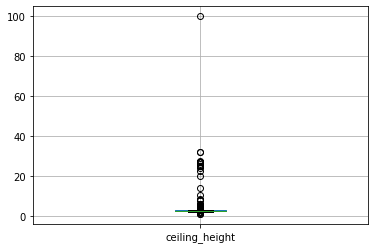

In [19]:
data.boxplot(column='ceiling_height')

In [20]:
data['ceiling_height'].describe()

count    14502.000000
mean         2.771498
std          1.261143
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Можно предположить, что при заполнении высоты потолков не указали запятую и высота 3,2 метра превратилась в 32. Или указали лишний символ и 10 метров (например, в квартире, где два этажа) превратились в 100. Предположим, что это так. Поэтому потолки выше 10 метров разделим на 10.  
Так же много пропусков. Их заполним медианой.  
Высота потолка менее 2 метров так же может быть ошибкой. Эти данные удалим.

In [21]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10

data = data[data['ceiling_height'] >= 2]

In [22]:
data['ceiling_height'].describe()

count    23691.000000
mean         2.698093
std          0.236749
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [23]:
data.sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.0,5.0,63.9,2,NaN,...,12.0,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.0,18.0,16.6,9,NaN,...,8.8,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
22960,17,2300000.0,53.60,2018-10-18T00:00:00,2,2.0,2.0,19.0,1,NaN,...,10.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20520,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.0,12.0,15.0,9,NaN,...,11.8,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.0,5.0,46.0,1,NaN,...,6.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,3,1400000.0,30.00,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
17442,0,5350000.0,54.00,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
15743,14,5600000.0,67.00,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,...,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
5863,20,5650000.0,45.00,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


**Kitchen area**

In [24]:
data['kitchen_area'].describe()

count    21415.000000
mean        10.564123
std          5.861738
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Площадь кухни может быть большая, если в квартире 19 комнат. Но на сколько точно, сказать сложно. Кухня может быть совмещена с гостинной  и указана их общая площадь.  
Не будем заполнять пропуски, чтобы не было конфликтов с общей площадью квартиры и жилой.  
Оставим эти пропуски и максимальные значения.

**Living area**

In [25]:
data['living_area'].describe()

count    21788.000000
mean        34.433011
std         21.837814
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64

Здесь поступим так же, как с площадью кухни. 

**Is_apartment**

Посмотрим уникальные значения.

In [26]:
unique_values = data['is_apartment'].unique()
print(unique_values)

[nan False True]


In [27]:
data['is_apartment'].fillna(False, inplace=True)

Квартира либо является апартаментами, либо нет. Поэтому пропуски заполним отрицательным ответом.

**Balcony**

In [28]:
data['balcony'].fillna(0, inplace=True)

Здесь так же, как с апартаментами. Если балкон не указан, значит его нет.

**Floors_total**

Посмотрим, максимальное количество этажей и общую информацию.

In [29]:
data['floors_total'].describe()

count    23605.000000
mean        10.671468
std          6.594371
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [30]:
top_10_floors = data.sort_values(by='floors_total', ascending=False).head(10)
display(top_10_floors['floors_total'])

2253     60.0
16731    52.0
397      36.0
11079    36.0
5807     36.0
15982    35.0
21599    35.0
5749     35.0
1060     35.0
21809    35.0
Name: floors_total, dtype: float64

In [31]:
data = data.dropna(subset=['floors_total'])
data = data[data['floors_total'] <= 37]

Пропуски с количеством этажей дома были удалены. Они занимают незначительную часть от всех данных. 
Максимальные значения так же удалили. В основном в доме максимум 36 этажей.

**Days_exposition**

In [32]:
data['days_exposition'].describe()

count    20431.000000
mean       180.917527
std        219.723615
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Объявление могли не снять с размещения после продажи, из-за чего видим такое максимально количество дней. Либо квартира действительно долго продается. Эти данные заполнять не будем, так как нельзя с точностью определить причину.

**Locality_name**

In [33]:
data = data.dropna(subset=['locality_name'])

Строк с пропусками в названиях населенных пунктов не много, поэтому адалим их.

**Посмотрим на итог**

In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2220
balcony                     0
locality_name               0
airports_nearest         5523
city_centers_nearest     5500
parks_around_3000        5499
parks_nearest           15531
ponds_around_3000        5499
ponds_nearest           14525
days_exposition          3171
dtype: int64

Заполнили пропуски там, где возможно и удалили выбивающиеся значения.  
Столбцы total_images, balcony не вызывают подозрений. Если квартира большая, то в ней может быть 5 балконов на 19 комнат и 50 фотографий.  
Наличие и расстояние до парка или пруда, расстояние до центра и аэропорта не заполняется человеком. Данные заполняются автоматически и способ расчета расстояния не известен.
Поэтому эти данные не трогаем, чтобы не исказить результаты анализа.

**Снова посмотрим общую информацию датафрейма.**

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23555 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23555 non-null  int64  
 1   last_price            23555 non-null  float64
 2   total_area            23555 non-null  float64
 3   first_day_exposition  23555 non-null  object 
 4   rooms                 23555 non-null  int64  
 5   ceiling_height        23555 non-null  float64
 6   floors_total          23555 non-null  float64
 7   living_area           21690 non-null  float64
 8   floor                 23555 non-null  int64  
 9   is_apartment          23555 non-null  bool   
 10  studio                23555 non-null  bool   
 11  open_plan             23555 non-null  bool   
 12  kitchen_area          21335 non-null  float64
 13  balcony               23555 non-null  float64
 14  locality_name         23555 non-null  object 
 15  airports_nearest   

Изменим тип данных там, где это необходимо. Булев тип помогает четко определить "да" или "нет", то есть объект либо является студией, либо не является. Так же переведем в формат даты и времени столбец с датой объявления и количество балконов в целочисленный. Изменение типа данных необходимо для корректного анализа.

In [36]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data['studio'] = data['studio'].astype(bool)
data['open_plan'] = data['open_plan'].astype(bool)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['floors_total'] = data['floors_total'].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23555 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23555 non-null  int64         
 1   last_price            23555 non-null  float64       
 2   total_area            23555 non-null  float64       
 3   first_day_exposition  23555 non-null  datetime64[ns]
 4   rooms                 23555 non-null  int64         
 5   ceiling_height        23555 non-null  float64       
 6   floors_total          23555 non-null  int64         
 7   living_area           21690 non-null  float64       
 8   floor                 23555 non-null  int64         
 9   is_apartment          23555 non-null  bool          
 10  studio                23555 non-null  bool          
 11  open_plan             23555 non-null  bool          
 12  kitchen_area          21335 non-null  float64       
 13  balcony         

**2.3 Посмотрим уникальные значения населенных пунктов, чтобы выявить неявные дубликаты.**

In [37]:
unique_localities = data['locality_name'].unique()
print(unique_localities)

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

**Заменим явные дубликаты.**

In [38]:
data['locality_name'] = (data['locality_name'].str.replace('ё', 'е').replace(['коттеджный посёлок', 'поселок городского типа', 'городской посёлок'], 'поселок', regex=True))
unique_localities = data['locality_name'].unique()
print(unique_localities)

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор'
 'Гатчина' 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'
 'Луга' 

### Добавьте в таблицу новые столбцы

**Добавим новые столбцы в датафрейм.**

In [41]:
data['price_per_sqm'] = (data['last_price'] / data['total_area']).round(2)


index = pd.DatetimeIndex(data['first_day_exposition'])
data['day_of_week'] = index.day
data['month'] = index.month
data['year'] = index.year


def i_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


data['floor_type'] = data.apply(i_floor_type, axis=1)


data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sqm,day_of_week,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,7,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,4,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,20,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,24,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,19,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.85,21,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.37,15,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.71,11,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,173.0,3.0,196.0,602.0,149511.40,28,3,2017,другой,10.0


Помимо столбца с полной датой публикации добавили столбцы с днем, месяцем и годом, что позволяет при необходимости отфильтровать по нужому параметру.  
Так же добавлена категория с этажом.  
А расстояние до центра переведено в киллометры для удобства восприятия и анализа.

### Проведите исследовательский анализ данных

4.1 Ранее были удалены аномалии в данных. Общая площадь, жилая площадь, площадь кухни, высота потолков в разы превышали среднее и медианное значение. Можно предположить, что при заполнении данных была допущена ошибка - отсутсвие запятой. То есть вместо 3,2 метров было указано 32 метра. Однако, может быть указана лишняя цифра и высота потолка 3 метра.
На цену объекта влияют площадь квартиры, количество комнат, этаж, расстояние до центра города в метрах, расстояние до ближайшего парка.
Поставили ограничения на цену объекта, чтобы проанализировать данные по среднестатистическому жилью. Тем самым более дорогое, элитное и редкое жилье не учитывается.
Добавлена категория с этажом. Многие не хотят покупать квартиры на первом и последнем этаже. Следовательно в объявлении ставят цену ниже, чтобы повысить шанс продажи. Что бы, при необходимости выявить жту зависимость, поможет категория.

In [64]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sqm,day_of_week,month,year,city_centers_nearest_km
count,23555.000000,23555.000000,23555.000000,23555.000000,23555.00000,23555.000000,21690.000000,23555.000000,21335.000000,23555.000000,...,18056.000000,8024.000000,18056.000000,9030.000000,20384.000000,2.355500e+04,23555.000000,23555.000000,23555.000000,18055.000000
mean,9.877521,6491.326003,60.274831,2.070176,2.69811,10.669667,34.431297,5.875738,10.555273,0.593759,...,0.611376,490.548106,0.769052,518.356257,180.774088,9.931979e+04,15.481639,6.400849,2017.370919,14.185655
std,5.680976,9356.312989,35.170461,1.076330,0.23711,6.578946,21.852356,4.868123,5.856910,0.960714,...,0.802034,341.654043,0.938276,278.031185,219.770978,4.893893e+04,8.635129,3.493120,1.037512,8.618715
min,0.000000,430.000000,12.000000,0.000000,2.00000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,7.962960e+03,1.000000,1.000000,2014.000000,0.000000
25%,6.000000,3400.000000,40.000000,1.000000,2.60000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,45.000000,7.656432e+04,8.000000,3.000000,2017.000000,9.000000
50%,9.000000,4646.000000,52.000000,2.000000,2.65000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,1.000000,503.000000,95.000000,9.500000e+04,15.000000,6.000000,2017.000000,13.000000
75%,14.000000,6790.000000,69.700000,3.000000,2.70000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,1.142132e+05,23.000000,10.000000,2018.000000,16.000000
max,50.000000,401300.000000,631.200000,19.000000,10.00000,36.000000,409.000000,33.000000,107.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,31.000000,12.000000,2019.000000,66.000000


**Изучим данные общей площади квартиры.**

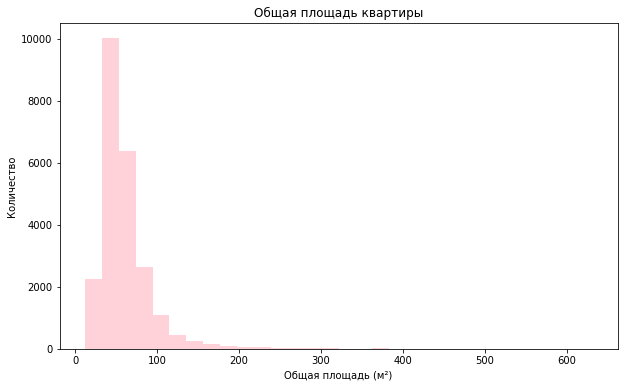

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(data['total_area'], bins=30, alpha=0.7, color='pink')
plt.title('Общая площадь квартиры')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Количество')
plt.show()

Большую часть занимают квартиры общей площадью примерно от 40 до 70 квадратных метров. Квартиры площадью более 100 квадратных метров продают гораздо реже.

**Изучим жилую площадь квартиры.**

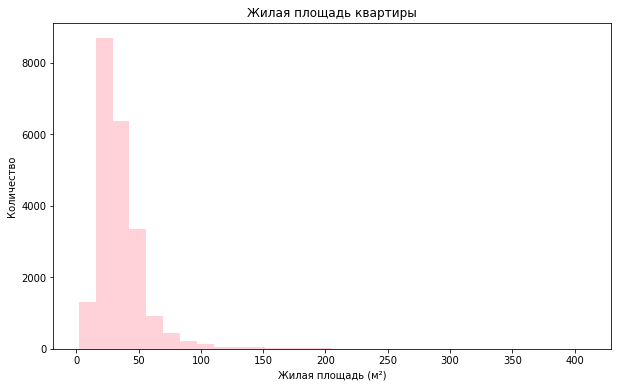

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(data['living_area'], bins=30, alpha=0.7, color='pink')
plt.title('Жилая площадь квартиры')
plt.xlabel('Жилая площадь (м²)')
plt.ylabel('Количество')
plt.show()

Жилая площадь квартир в основном от 20 до 50 квадратных метров.

**Изучим площадь кухни.**

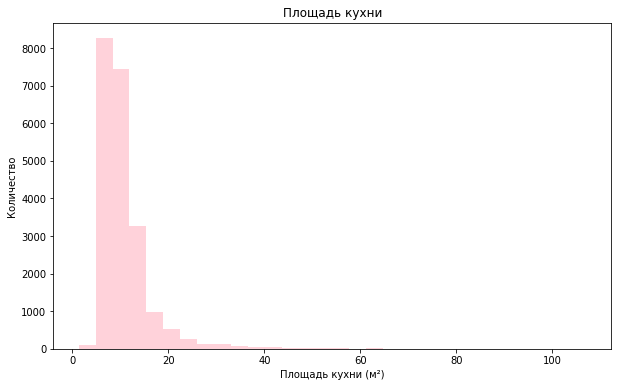

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(data['kitchen_area'], bins=30, alpha=0.7, color='pink')
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Количество')
plt.show()

Площадь кухни, как правило, занимает от 5 до 12 квадратных метров. Чем больше площадь, тем меньше объявлений.  
При этом кухни площадью менее 5 квадратных метров так же менее распространены. Можно предположить, что они находятся в квартирах студиях.

**Изучим цену объекта.**

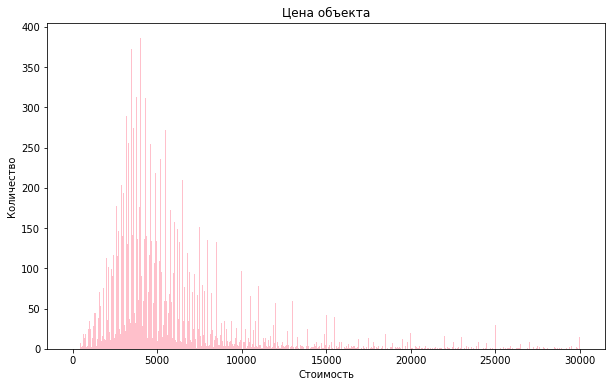

In [45]:
data['last_price'] = round(data['last_price'] / 1000, 0).astype(int)
plt.figure(figsize=(10, 6))
plt.hist(data['last_price'], bins=1000, range=(0, 30000), color='pink')
plt.title('Цена объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

В основном квартиры продавались по цене от 5 до 15 миллионов рублей.  
Для визуализации данные были разделены на 1000.

**Изучим количество комнат.**

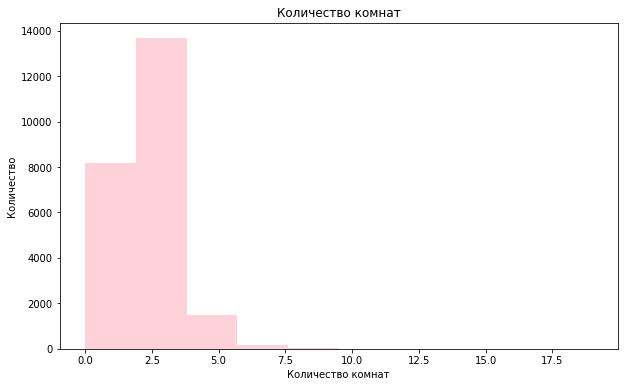

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(data['rooms'], bins=10, alpha=0.7, color='pink')
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
plt.show()

Основную часть занимают квартиры от 1 до 3 комнат. Квартир с большим количеством комнат  значительно меньше.

**Изучим высоту потолков.**

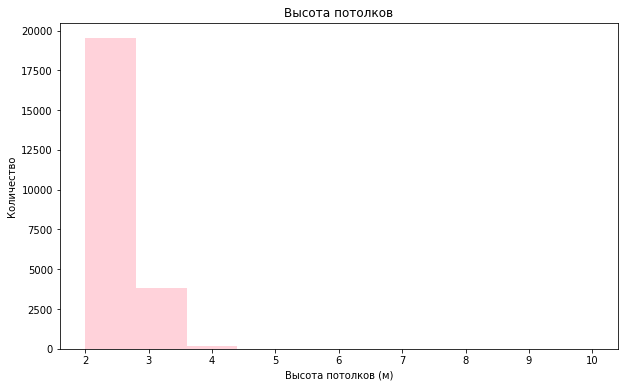

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(data['ceiling_height'], bins=10, alpha=0.7, color='pink')
plt.title('Высота потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество')
plt.show()

Стандартная высота потолков для большинства квартир от 2,5 до 2,8 метров.

**Изучим тип этажа квартиры.**

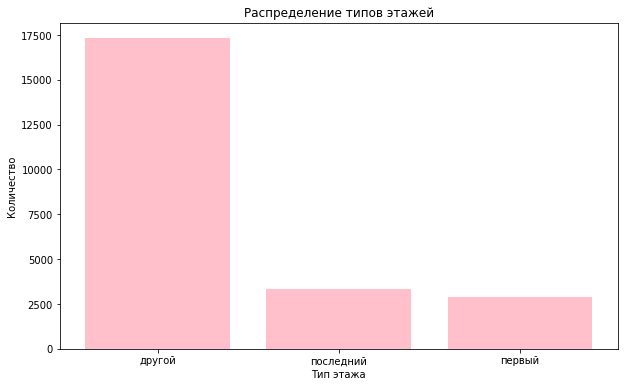

In [48]:
floor_type_counts = data['floor_type'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(floor_type_counts.index, floor_type_counts.values, color='pink')
plt.title('Распределение типов этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество')
plt.show()

Квартиры на первом и последнем этажах пользуются меньшей популярность, чем квартиры на других этажах.

**Изучим общее количество этажей в доме.**

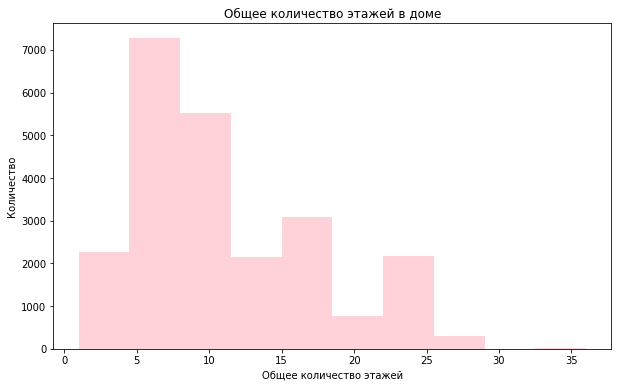

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(data['floors_total'], bins=10, alpha=0.7, color='pink')
plt.title('Общее количество этажей в доме')
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество')
plt.show()

Покупатели отдают предпочтения домам, в которых от 5 до 12 этажей. 

**Изучим расстояние до центра города в метрах.**

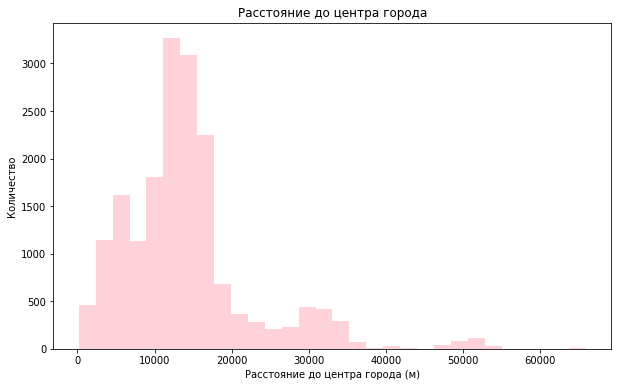

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(data['city_centers_nearest'], bins=30, alpha=0.7, color='pink')
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество')
plt.show()

Квартиры в радиусе от 8 до 18 километров от центра продают чаще. Квартиры в радиусе 40 и 60 километров от центра продают гораздо реже.

**Изучим расстояние до ближайшего парка.**

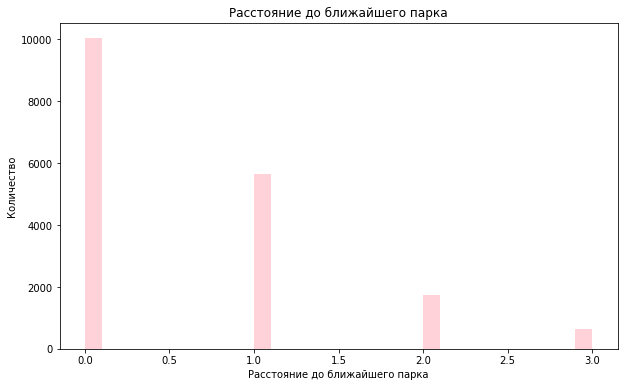

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(data['parks_around_3000'], bins=30, alpha=0.7, color='pink')
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество')
plt.show()

Парки рядом с квартирами либо отсутсвуют либо находятся в 1 километре от дома.

**4.2 Изучим, как быстро продавались квартиры.**

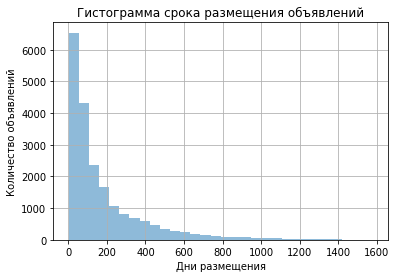

In [52]:
data['days_exposition'].hist(bins=30, alpha=0.5)
plt.xlabel('Дни размещения')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма срока размещения объявлений')
plt.show()

In [53]:
description = data['days_exposition'].describe()
display(description)

count    20384.000000
mean       180.774088
std        219.770978
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана количества дней размещения объявлений равна 180 дням.
Продажи, занимающие меньше 45 дней, можно считать быстрыми, а продажи, занимающие более 95 - долгими. Однако, учитывая наши данные, можно заметить, что большинство продаж происходит в диапазоне до 95 дней. Это указывает на то, что большинство квартир продаются в течение относительно короткого времени, но есть и исключения, которые занимают значительно больше времени.  

**4.3 Изучим зависимость цены от других факторов.**

4.3.1 Зависимость от общей площади квартиры.

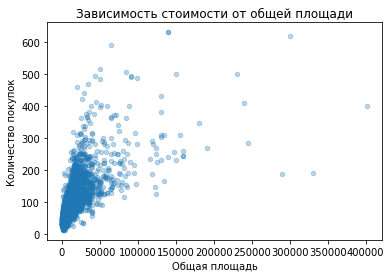

0.6951567833788871

In [54]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3) 
plt.xlabel('Общая площадь')
plt.ylabel('Количество покупок')
plt.title('Зависимость стоимости от общей площади')
plt.show()

display(data['last_price'].corr(data['total_area']))

На данном графике видим, что, чем больше площадь квартиры, тем выше цена. При этом большую часть недвижимости занимают квартиры с площадью примерно 45 квадратных метров.

4.3.2 Зависимость от жилой прощади.

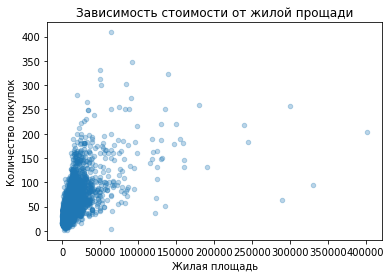

0.6046712163390315

In [55]:
data.plot(y='living_area', x='last_price', kind='scatter', alpha=0.3) 
plt.xlabel('Жилая площадь')
plt.ylabel('Количество покупок')
plt.title('Зависимость стоимости от жилой прощади')
plt.show()

display(data['last_price'].corr(data['living_area']))

На данном графике так же видна зависимость цены от жилой прощади. 

4.3.3 Зависимость от площади кухни.

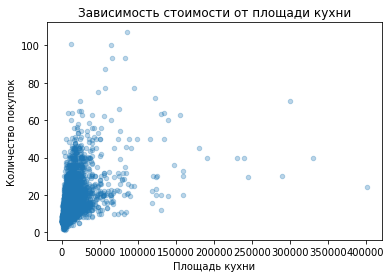

0.5121324463514977

In [56]:
data.plot(y='kitchen_area', x='last_price', kind='scatter', alpha=0.3)
plt.xlabel('Площадь кухни')
plt.ylabel('Количество покупок')
plt.title('Зависимость стоимости от площади кухни')
plt.show()

display(data['last_price'].corr(data['kitchen_area']))

Так же, как и на прошлых графиках, мы видим, что площадь кухни влияет на стоимость.

4.3.4 Зависимость от количества комнат.

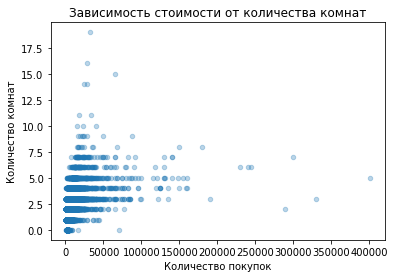

0.39154389422633107

In [57]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)
plt.xlabel('Количество покупок')
plt.ylabel('Количество комнат')
plt.title('Зависимость стоимости от количества комнат')
plt.show()

display(data['last_price'].corr(data['rooms']))

На данном графике есть незначительная зависимость стоимости от количества комнат. Можно сделать вывод, что на стоимость вляют другие факторы. Например, площадь или расположение.

4.3.5 Зависимость от этажа.

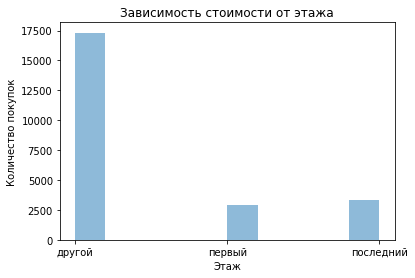

In [58]:
plt.hist(data['floor_type'], bins=10, alpha=0.5)
plt.xlabel('Этаж')
plt.ylabel('Количество покупок')
plt.title('Зависимость стоимости от этажа')
plt.show()

На этом графике видно, что первый и последний этаж не пользуются популярностью. Отказ покупать квартиру на первом этаже можно обосновать подвалом под квартирой - будет сырость или насекомые. Квартира на последнем этаже может быть затоплена, если будут проблемы с крышей. К обоим вариантам так же можно отнести воровство. Грабители могут залезть с улицы или с крыши.
Чтобы снизить риск для себя и своего жилья, люди покупают квартиры на других этажах.

4.3.6 Зависимость от даты размещения объявления.

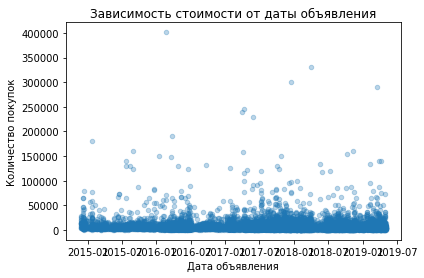

In [59]:
data.plot(x='first_day_exposition', y='last_price', kind='scatter', alpha=0.3) 
plt.xlabel('Дата объявления')
plt.ylabel('Количество покупок')
plt.title('Зависимость стоимости от даты объявления')
plt.show()

На графике видно, что c каждым годом объявления о продаже квартиры становятся более актуальны. Квартиры стали чаще размещаться на продажу и соответственно покупаться. Всплеск может быть связан с ростом стоимости.

**4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

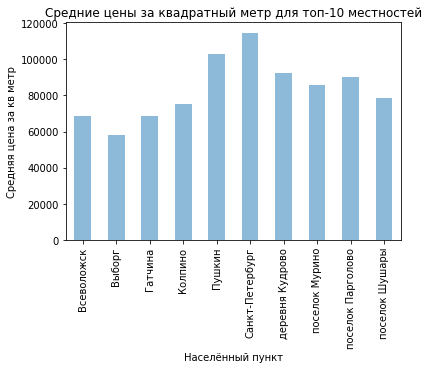

In [60]:
top_localities = data['locality_name'].value_counts().head(10).index

data_filtered = data[data['locality_name'].isin(top_localities)]

average_price_per_sqm = data_filtered.groupby('locality_name')['price_per_sqm'].mean()

average_price_per_sqm.plot(kind='bar', alpha=0.5)
plt.xlabel('Населённый пункт')
plt.ylabel('Средняя цена за кв метр')
plt.title('Средние цены за квадратный метр для топ-10 местностей')
plt.show()

На графике видно, что максимальная стоимость квадратного метра в Санкт-Петербурге. По мере дальности от центра города стоимость снижается.

**5.5 Посчитаем среднюю стоимость квартир в Санкт-Петербурге с зависимости от расстояния от центра города.**

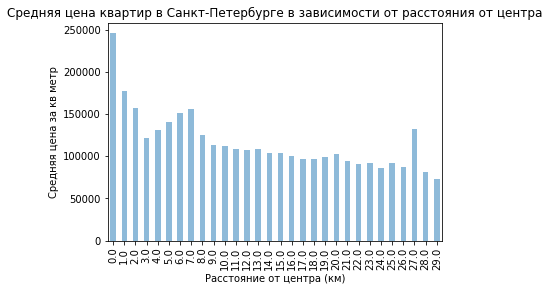

In [61]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

average_price_per_km = data_spb.groupby('city_centers_nearest_km')['price_per_sqm'].mean()

average_price_per_km.plot(kind='bar', alpha=0.5)
plt.xlabel('Расстояние от центра (км)')
plt.ylabel('Средняя цена за кв метр')
plt.title('Средняя цена квартир в Санкт-Петербурге в зависимости от расстояния от центра')
plt.show()

В двух километрах от центра Питера самая высокая стоимость за квадратный метр жилья. При этом есть скачки в стоимости по мере отдаления от центра. 
Зависимость от расстояния от центра есть. При этом на стоимость влияют и сторонние факторы, из-за которых в первые 7 км происходят скачки.

### Напишите общий вывод

Для проведения анализа первым этапом были скорректированы данные датафрейма: 
* Названия колонок были приведены к единому стилю.  
* Заполнены пропуски.
* Скорректировали тип данных, так как они не соответствовали.  
* Указали булевы значения, формат даты и целочисленные значения.  
* Убрали дубликаты в названиях населенных пунктов и привели их к единому стилю.  
* Удалили выбивающиеся и редкие значения.
* Добавили столбцы с днем, месяцем и годом, что позволяет при необходимости отфильтровать по нужому параметру.  
* Так же добавлена категория с этажом. 
* Расстояние до центра переведено в киллометры для удобства восприятия и анализа.  


После предобработки данных выяснено, что:
* Общая площадь квартир на продажу в основном от 40 до 70 квадратных метров. Жилая площадь от 20 до 50 квадратных метров, а кухня от 5 до 12.
* Большую долю составляют квартиры с 1-3 комнатами. С высотой потолков от 2,5 до 2,8 метров.
* Как правило, в доме до 20 этажей. В приоритете покупают квартиры, которые не находятся на 1 и последнем этажах.  
* Квартиры в радиусе от 8 до 18 километров от центра продают чаще.
* Ближайший парк находится в радиусе 1 километра либо отсутствует вообще.
* Большинство квартир продаются от 1 до 4 месяцев.  
* Стоимость квартиры растет с увеличением жилой, общей и площадью кухни.    
* С каждым годом потребность в приобритении жилья растет. Увеличивается количество объявлений и покупок.  
* Лидером по стоимости жилья за квадратный метр является Санкт-Петербург. По мере отдаления от города стоимость снижается.  
* В первые 7 км от центра в Санкт-Петербурге стоимость за квадратный метр занимает лидирующие позиции и далее спадает с периодическим незначительным возрастанием.
